In [1]:
####### 하이퍼파라미터 선언 및 이미지 변환
# pet 데이터세트를 VGG-16 모델에서 학습한 방식과 동일한 형태로 변환한 후 데이터로더 적용
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms, models


hyperparams = {
    "batch_size"   : 4,
    "learning_rate": 0.0001,
    "epochs"       : 5,
    "transform"    : transforms.Compose(
        [
            transforms.Resize(256),     # 256x256으로 조절
            transforms.CenterCrop(224), # 224x224로 중앙 자르기
            # 256x256으로 변환 후 중앙자르기를 함으로써 객체를 살려 특징 최대한 유지
            # 만약 1024x1024를 변환없이 중앙자르기하면 객체의 크기가 작아지므로 분류 어려움
            transforms.ToTensor(),      # 0~1로 픽셀값 스케일링, (HxWxC)->(CxHxW)
            transforms.Normalize(       # ImageNet 데이터세트 대표값으로 정규화
                mean = [0.48235, 0.45882, 0.40784],
                std  = [1.0/255.0, 1.0/255.0, 1.0/255.0]
            )
        ]
    )
}

# 데이터 불러오기 (이미지폴더 데이터세트 클래스를 통해 이미지와 레이블을 자동으로 인식(pet데이터세트 구조 같은 경우))
train_dataset = ImageFolder("../datasets/pet/train", transform=hyperparams["transform"])
test_dataset  = ImageFolder("../datasets/pet/test", transform=hyperparams["transform"])

# 데이터로더를 통해 배치크기만큼 데이터 나눔
train_dataloader = DataLoader(train_dataset, batch_size=hyperparams["batch_size"], shuffle=True, drop_last=True)
test_dataloader  = DataLoader(test_dataset, batch_size=hyperparams["batch_size"], shuffle=True, drop_last=True)

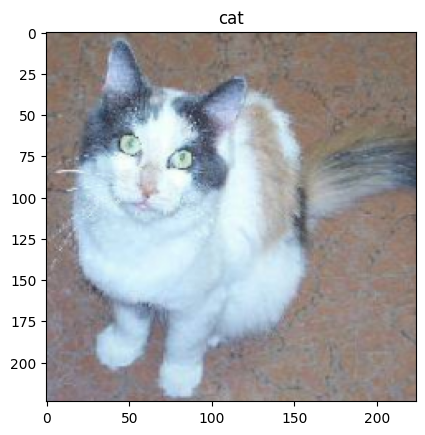

In [2]:
####### 데이터 시각화
import numpy as np
from matplotlib import pyplot as plt


mean = [0.48235, 0.45882, 0.40784]
std  = [1.0/255.0, 1.0/255.0, 1.0/255.0]

# 첫 번째 배치의 이미지와 라벨 변수들을 불러옴
images, labels = next(iter(train_dataloader))
# 
for image, label in zip(images, labels): 
    image = image.numpy().transpose((1, 2, 0))  # transpose(1,2,0): C,H,W -> H,W,C
    # 이미지 정규화 연산되었으므로 반대로 진행, 픽셀범위 1/255됐으므로 x255
    image = ((std * image + mean) * 255).astype(np.uint8)

    plt.imshow(image)
    plt.title(train_dataset.classes[int(label)]) # 텐서화된 라벨도 다시 int로하여 해당 이미지의 클래스 출력
    plt.show()
    break

In [2]:
####### VGG-16 모델 불러오기 함수
# 대규모 데이터세트로 사전 학습된 알렉스넷 가중치 불러오기
model = models.vgg16(weights="VGG16_Weights.IMAGENET1K_V1")
print(model)

# 특징추출(features), 평균풀링(avgpool), 분류기(classifier)로 구성됨

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1